In [140]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
# Load datasets for mental health services, SBHCs, and police outcomes
mhs = pd.read_csv('../../data_sets/cleaned_data_sets/smh_service_clean.csv')
sbhc = pd.read_csv('../../data_sets/cleaned_data_sets/list_of_nyc_schoolbhc_clean.csv')
policing = pd.read_csv('../../data_sets/cleaned_data_sets/clean_SSA_Report_School_2020.csv')
demographics = pd.read_csv('../../data_sets/cleaned_data_sets/clean_demographic_snapshot_schools.csv')

In [157]:
mhs.head()
# mhs['ATS System Code'].value_counts()
# Only one record for school

,Unnamed: 0,ATS System Code,Location Name,Primary Address,Area,Zip Code,Type of Service
0,0,01M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,MANHATTAN,10009,Community School MH
1,1,01M020,P.S. 020 Anna Silver,166 ESSEX STREET,MANHATTAN,10002,School-based Mental Health Clinic
2,2,01M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,MANHATTAN,10009,School-based Mental Health Clinic
3,3,01M063,The STAR Academy - P.S.63,121 EAST 3 STREET,MANHATTAN,10009,School-based Mental Health Clinic
4,4,01M064,P.S. 064 Robert Simon,600 EAST 6 STREET,MANHATTAN,10009,School-based Health Center w/ Mental Health


In [143]:
sbhc.head()

,Unnamed: 0,SBHC Sponsor,SBHC Campus,Address,School DBN,School Name
0,0,Bedford-Stuyvesant Family Health Center,PS 054 Samuel C Barnes,"195 Sandford Street\nBrooklyn, NY, 11205",13K054 K141@13K054,P.S. 054 Samuel C. Barnes D75 Program
1,1,Bedford-Stuyvesant Family Health Center,PS 256 Benjamin Banneker,"114 Kosciuszko Street\nBrooklyn, NY, 11216",13K256\n84K702,P.S. 256 Benjamin Banneker Community Partnersh...
2,2,Bedford-Stuyvesant Family Health Center,George E Wibecan Campus,"794 Monroe Street\nBrooklyn, NY, 11221",16K309\n84K712,P.S. 309 The George E. Wibecan Preparatory Aca...
3,3,Brooklyn Plaza Medical Center,Benjamin Banneker\nAcademy,"71 Clinton Avenue\nBrooklyn, NY, 11205",13K670,Benjamin Banneker Academy
4,4,Brownsville Multi-Service Family Health,Thomas Jefferson Campus,"400 Pennsylvania Avenue\nBrooklyn, NY, 11207",19K502\n19K504\n19K507\n19K510\n79K925@K435\n7...,FDNY - Captain Vernon A. Richard High School F...


In [144]:
policing.head()

,Unnamed: 0,School Campus,Intervention Type,Incident Location,Greater Than 21,Scanning Type,Scanning Incident,School Related,School Hours,Enforcment By,Restraints,Force,Type Of Force,Top Charge,SummonsCharge,Classification
0,0,47 THE AMERICAN SIGN LANGUAGE & ENGLISH SECOND...,Child in Crisis,On-Site,No,Non-Scanning,N,Y,Y,NaN,No Restraints,N,None,NaN,NaN,NaN
1,1,47 THE AMERICAN SIGN LANGUAGE & ENGLISH SECOND...,Child in Crisis,On-Site,No,Non-Scanning,N,Y,Y,NaN,No Restraints,N,None,NaN,NaN,NaN
2,2,47 THE AMERICAN SIGN LANGUAGE & ENGLISH SECOND...,Mitigated,On-Site,No,Non-Scanning,N,Y,Y,DOE,No Restraints,N,None,NaN,NaN,NaN
3,3,Abraham Lincoln HS(BS),Juvenile Report,On-Site,No,Full-Time,N,Y,N,PATROL,No Restraints,N,None,NaN,NaN,M
4,4,Abraham Lincoln HS(BS),Juvenile Report,On-Site,No,Full-Time,Y,Y,Y,SSA,No Restraints,N,None,NaN,NaN,M


In [145]:
demographics.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,2.2%,0,0.0%,51,28.7%,12,6.7%,152,85.4%,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,3.2%,0,0.0%,49,25.8%,8,4.2%,161,84.7%,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,3.4%,0,0.0%,39,22.4%,8,4.6%,147,84.5%,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,4.7%,0,0.0%,46,24.2%,17,8.9%,155,81.6%,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,193,17,29,29,27,30,32,...,5.7%,0,0.0%,43,22.3%,21,10.9%,158,81.9%,85.6%


# Do mental health services provided at schools differ according to % poverty, disability, English language learners of student body?

### We do not use the same approach to mental health services at every school. A variety of programs are implemented through the School Mental Health Program. Schools were assigned to mental health programs based on various factors such as school need, community resources, and existing mental health services. One of the following mental health programs is offered at your child’s school:

* **Community School Mental Health Program**
  * works with community mental-health providers to offer counseling, trainings, interventions, and crisis support.
* **School Mental Health Specialist Program**
  * connects schools with mental-health organizations, provides trainings, implements trauma-informed group interventions and links students and families to community resources.
* **School Mental Health Prevention and Intervention Program**
  * offers counseling, trainings, crisis support, and interventions.
* **School Response Team Programs**
  * provide crisis support and interventions, staff trainings, and mental-health referrals for families and students.
* **School-Based Mental Health Clinics (Article 31)**
  * provide individual and family treatment and crisis support in the school for students and their families.
* **School-Based Health Centers with Mental Health Services (Article 28)**
  * provide health services such as physical exams, vaccinations, and mental health services.

[source](https://www.schools.nyc.gov/school-life/health-and-wellness/mental-health)

In [156]:
# Merge mhs and demographics data
mhs_demo = mhs.merge(
    demographics,
    how='inner',
    left_on='ATS System Code',
    right_on='DBN'
)

# Subset just to 2020-21 demographics for now (the MHS data is from 2020-21)
mhs_demo_21 = mhs_demo[mhs_demo['Year'] == '2020-21']

mhs_demo_21.head()

,Unnamed: 0,ATS System Code,Location Name,Primary Address,Area,Zip Code,Type of Service,DBN,School Name,Year,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
4,0,01M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,MANHATTAN,10009,Community School MH,01M015,P.S. 015 Roberto Clemente,2020-21,...,5.7%,0,0.0%,43,22.3%,21,10.9%,158,81.9%,85.6%
9,1,01M020,P.S. 020 Anna Silver,166 ESSEX STREET,MANHATTAN,10002,School-based Mental Health Clinic,01M020,P.S. 020 Anna Silver,2020-21,...,7.3%,1,0.2%,90,21.8%,49,11.9%,292,70.9%,76.2%
14,2,01M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,MANHATTAN,10009,School-based Mental Health Clinic,01M034,P.S. 034 Franklin D. Roosevelt,2020-21,...,2.9%,0,0.0%,107,39.2%,17,6.2%,Above 95%,Above 95%,Above 95%
19,3,01M063,The STAR Academy - P.S.63,121 EAST 3 STREET,MANHATTAN,10009,School-based Mental Health Clinic,01M063,The STAR Academy - P.S.63,2020-21,...,9.1%,3,1.4%,58,27.9%,3,1.4%,160,76.9%,76.0%
24,4,01M064,P.S. 064 Robert Simon,600 EAST 6 STREET,MANHATTAN,10009,School-based Health Center w/ Mental Health,01M064,P.S. 064 Robert Simon,2020-21,...,4.1%,1,0.5%,58,26.4%,4,1.8%,201,91.4%,88.2%


In [147]:
mhs_demo_21['Type of Service'].unique()

array(['Community School MH', 'School-based Mental Health Clinic',
       'School-based Health Center w/ Mental Health',
       'School Mental Health Specialist Program', 'School Response Team',
       'Prevention Intervention Program MH', 'H+H School'], dtype=object)

In [148]:
def remove_non_numbers(x):
    '''
    Function to take a string and remove any non-numeric or decimal points, in order to cast as float.
    '''
    import re
    
    return float(re.sub('[^\d+\.]', '', x))


def plot_percent_and_category(df, percent, category):
    '''
    Function to plot a percent variable against a categorical variable.
    
    Args: df: a pandas DataFrame
    percent: string, column name of percent column
    category: string, column name of cateogrical column
    
    Returns:
    '''
    # Set x as float of % poverty
    x = df[percent].map(remove_non_numbers)
    y = df[category].astype('category')
    
    sns.boxplot(x=x, y=y)
    
    plt.show()

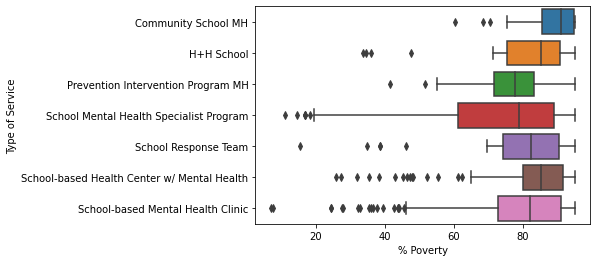

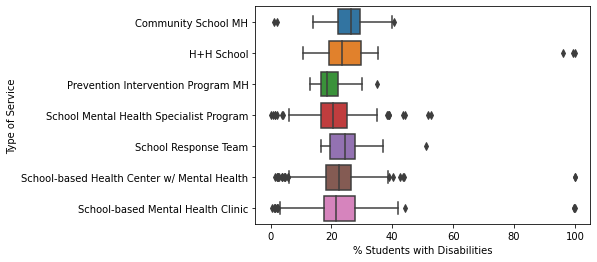

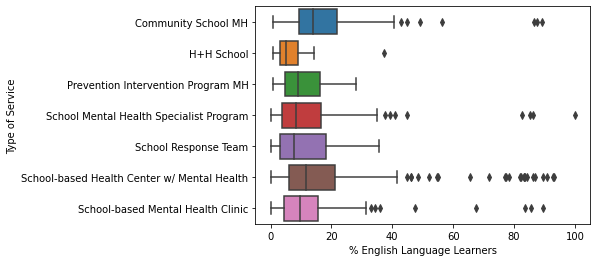

In [149]:
plot_percent_and_category(mhs_demo_21, '% Poverty', 'Type of Service')
plot_percent_and_category(mhs_demo_21, '% Students with Disabilities', 'Type of Service')
plot_percent_and_category(mhs_demo_21, '% English Language Learners', 'Type of Service')

In [150]:
def one_way_anova(df, percent):
    
    try:
        df[percent] = df[percent].map(remove_non_numbers)
    except:
        df[percent] = df[percent]

    _, pvalue = stats.f_oneway(
        df[df['Type of Service'] == 'Community School MH'][percent],
        df[df['Type of Service'] == 'H+H School'][percent],
        df[df['Type of Service'] == 'Prevention Intervention Program MH'][percent],
        df[df['Type of Service'] == 'School Mental Health Specialist Program'][percent],
        df[df['Type of Service'] == 'School Response Team'][percent],
        df[df['Type of Service'] == 'School-based Health Center w/ Mental Health'][percent],
        df[df['Type of Service'] == 'School-based Mental Health Clinic'][percent]
    )
    
    return '{}: {}'.format(percent, pvalue)

In [151]:
one_way_anova(mhs_demo_21, '% Poverty')

'% Poverty: 2.4195759375168023e-21'

In [152]:
one_way_anova(mhs_demo_21, '% Students with Disabilities')

'% Students with Disabilities: 1.3227768105444662e-08'

In [154]:
one_way_anova(mhs_demo_21, '% English Language Learners')

'% English Language Learners: 5.239578472062176e-09'

In [155]:
mhs_demo_21.groupby('Type of Service')[['% Poverty', '% Students with Disabilities', '% English Language Learners']].mean()

,% Poverty,% Students with Disabilities,% English Language Learners
Type of Service,,,
Community School MH,88.956589,25.760465,18.119380
H+H School,78.057692,31.296154,7.042308
Prevention Intervention Program MH,75.862791,20.011628,10.558140
School Mental Health Specialist Program,72.826923,20.987574,11.443195
School Response Team,76.227586,25.158621,12.603448
School-based Health Center w/ Mental Health,83.345896,22.364925,18.155970
School-based Mental Health Clinic,77.554167,23.215625,12.568750
